In [7]:
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [8]:
import pandas as pd
basePath = "/Users/kaimcconnell/Whitman Spring 2019/Machine Learning/Project1/data/6036-labeled-pokemon-pictures"
csvPath = basePath + "/names_and_strengths.csv"
csvData = pd.read_csv(csvPath)
print(csvData[30:40])

         name  strength
30      Absol       465
31      Absol       465
32      Absol       465
33      Absol       465
34   Accelgor       495
35   Accelgor       495
36  Aegislash       520
37  Aegislash       520
38  Aegislash       520
39  Aegislash       520


name        Magmortar
strength          540
Name: 3000, dtype: object


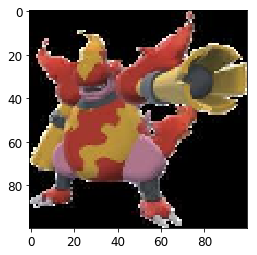

In [9]:
#What does an individual entry look like for the images and the data?
print(csvData.iloc[3000])
imagePath = basePath + "/poke_image_data.npy"
imageData = np.load(imagePath)
imshow(Image.fromarray(imageData[3000], 'RGB'))

In [10]:
#How many pokemon entries are there?
print(len(csvData))
print(len(imageData))

6036
6036


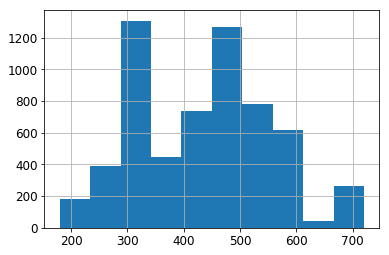

In [11]:
#What is the distribution of stat strengths?
csvData.strength.hist()

(array([570., 169.,  49.,  11.,   5.,   0.,   1.,   0.,   0.,   1.]),
 array([ 1. ,  8.2, 15.4, 22.6, 29.8, 37. , 44.2, 51.4, 58.6, 65.8, 73. ]),
 <a list of 10 Patch objects>)

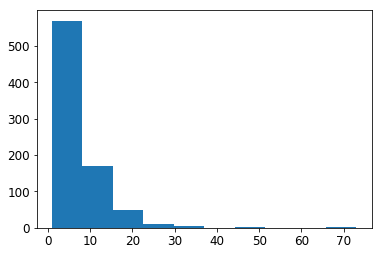

In [12]:
#What is the distribution of how many entries each pokemon has?
timesReferencedDictionary = {}
for entry in csvData.name:
    timesReferencedDictionary[entry] = 0
for entry in csvData.name:
    timesReferencedDictionary[entry] = timesReferencedDictionary[entry] + 1
histReferences = []
for key in timesReferencedDictionary:
    histReferences.append(timesReferencedDictionary[key])
plt.hist(histReferences)

In [13]:
#Which 3 Pokemon are referenced the most?
import collections as col
count = col.Counter(timesReferencedDictionary)
for key, val in count.most_common(3):
    print(key + ": " + str(val))

Pikachu: 73
Eevee: 46
Minior: 36


In [14]:
#Same pokemon doesnt show up in training and testing
names = list(sorted(set(csvData.name)))
print(len(names)) #number pokemon

806


In [15]:
names = csvData["name"]
strength = csvData["strength"]
#Image data in parallel
imageDataResize = np.ndarray((imageData.shape[0], 64,64))
#Resized to 64 by 64 pixels for easier runtime on training and testing
array = []
for im in range(imageData.shape[0]):
    resized_pic = Image.fromarray(imageData[im,:,:,0])
    resized_pic = resized_pic.resize((64,64))
    resized_pic = np.array(resized_pic)
    imageDataResize[im] = resized_pic
    #Flatten array to allow for input into random forest classifier
    array.append(imageDataResize[im].flatten())
    
#Create array of objects which connect the image to the pokemons name
nameToImage = []
for i in range(0,len(names)):
    array[i] = np.append(array[i], strength[i])
    nameToImage.append({"name": names[i], "image": array[i]})

#Ensuring successful flattening of image arrays
print(nameToImage[101]["image"][50:60])
print(nameToImage[100]["image"][50:60])

[7. 0. 6. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 1. 0. 4. 1. 0. 0. 0. 0.]


In [16]:
import random

#Shuffle the objects for random selection for testing and training
random.shuffle(nameToImage)
print(len(nameToImage)) #number different pokemon in set

6036


In [29]:
#Split data into training and testing datasets. Chose 80% training and 20% testing
x = round(len(nameToImage) * 0.8)
train = nameToImage[0:x]
test = nameToImage[x:len(nameToImage)]

print(len(train))
print(len(test))

4829
1207


In [30]:
#Create training and testing inputs and outputs
import numpy as np
y_train = []
x_train = []
#Train
for i in range(0, len(train)):
    y_train.append(train[i]["name"])
    x_train.append(train[i]["image"])
print(y_train[0])
print(x_train[0])
x_test = []
y_test = []
#Test
for i in range(0, len(test)):
    y_test.append(test[i]["name"])
    x_test.append(test[i]["image"])

Ninjask
[  0. 150. 141. ...   0.   0. 456.]


In [31]:
#Run randomforestclassifier on training dataset to create model
from sklearn.ensemble import RandomForestClassifier
print("RandomForest on Data set")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model = rf.fit(x_train,y_train)

RandomForest on Data set


In [32]:
#Test the created model and evaluate its accuracy
score_rf=model.score(x_test, y_test)
print("Acurracy: ", score_rf)

Acurracy:  0.188069594034797


In [33]:
from sklearn import cross_validation
features = []
names = []
for i in range(0, len(nameToImage)):
    features.append(nameToImage[i]["image"])
    names.append(nameToImage[i]["name"])
x_train, x_test, y_train, y_test = cross_validation.train_test_split(features, names, test_size=0.2, random_state=0)

print("crossvalidation on Data set")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(x_train,y_train)
score_rf=clf_rf.score(x_test, y_test)
print("Acurracy: ", score_rf)

crossvalidation on Data set
Acurracy:  0.21274834437086093
